
# Linear Regression

## **Imports**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Reading and Understanding the Data

In [5]:
df= pd.read_csv("USA_Housing.csv")

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
df.duplicated().sum()

0

<Axes: >

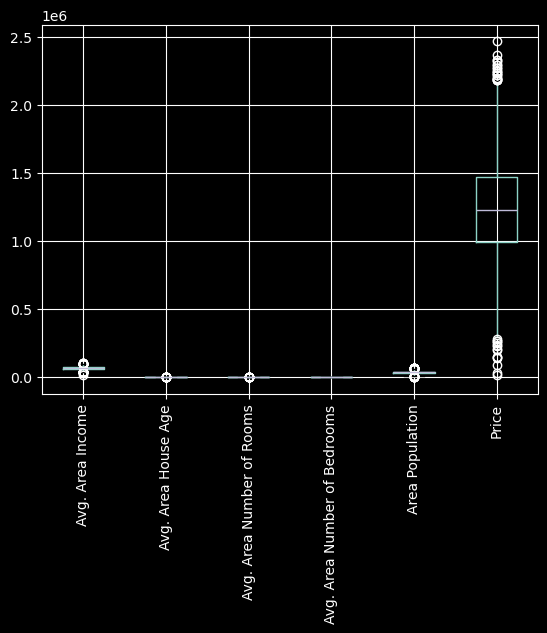

In [12]:
df.select_dtypes(include=np.number).boxplot(rot=90)

In [13]:
df.select_dtypes(include=np.number).corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## Splitting the Feature Data and Label Data

In [14]:
X = df.select_dtypes(include=np.number)
X = X.drop('Price',axis=1)

In [15]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [16]:
Y = df['Price']

In [17]:
Y = pd.DataFrame(Y,columns=['Price'],index=df.index)

In [18]:
Y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


## Feature Scailing

In [19]:
scaler = MinMaxScaler()

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X_scaled

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988
...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351
4996,0.675097,0.633450,0.444024,0.448889,0.366362
4997,0.507135,0.670026,0.208534,0.028889,0.476515
4998,0.558419,0.420389,0.517579,0.764444,0.611282


## Training and Testing Data

Spliting the data into training and testing sets.


In [23]:
X_scaled

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988
...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351
4996,0.675097,0.633450,0.444024,0.448889,0.366362
4997,0.507135,0.670026,0.208534,0.028889,0.476515
4998,0.558419,0.420389,0.517579,0.764444,0.611282


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=101)

## Training the Model

## Fitting the Regression Model:

In [25]:
lm = LinearRegression()

### **Fitting the Model**

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [27]:
# The coefficients
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [[1943536.00696484 1135859.49155065  913380.51978874    5934.23452298
  1057376.16666413]]
Intercept: 
 [-1421599.86815908]


In [28]:
lm.score(X_scaled,Y)

0.9180101147950919

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [29]:
predictions = lm.predict( X_test)

In [30]:
predictions = pd.DataFrame(predictions,columns=Y.columns)

In [31]:
predictions

,Price
0,1.258935e+06
1,8.226946e+05
2,1.742214e+06
3,9.729370e+05
4,9.945460e+05
...,...
1495,7.555650e+05
1496,1.168110e+06
1497,1.452641e+06
1498,6.457971e+05


** Create a scatterplot of the real test values versus the predicted values. **

In [32]:
predictions.isna().sum()

Price    0
dtype: int64

In [33]:
np.corrcoef(Y, predictions).shape

c:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\prakhar\anaconda\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


(6500, 6500)

**Error**

In [34]:
error = Y - predictions

error.isna().sum()

Price    3500
dtype: int64

In [35]:
print(Y.var(), predictions.var()) 

Price    1.246921e+11
dtype: float64 Price    1.154944e+11
dtype: float64


In [36]:
abs_error = np.abs(error)
mae = np.mean(abs_error) # mean absolute error
mae

392754.89084963355

In [37]:
np.mean(np.abs(error / Y)) * 100

39.91510359164581

In [38]:
sse = np.sum(error ** 2,axis=1)
sse

0       3.996054e+10
1       4.667572e+11
2       4.667983e+11
3       8.275967e+10
4       1.322068e+11
            ...     
4995    0.000000e+00
4996    0.000000e+00
4997    0.000000e+00
4998    0.000000e+00
4999    0.000000e+00
Length: 5000, dtype: float64

In [39]:
sst = np.sum((Y - Y.mean())**2,axis=1)
sst

0       2.994253e+10
1       7.497644e+10
2       2.995830e+10
3       8.147686e+08
4       3.613563e+11
            ...     
4995    2.954235e+10
4996    6.277283e+10
4997    4.053903e+10
4998    1.116614e+09
4999    4.472644e+09
Length: 5000, dtype: float64

In [40]:
1 - sse / sst

0        -0.334575
1        -5.225384
2       -14.581602
3      -100.574440
4         0.634137
           ...    
4995      1.000000
4996      1.000000
4997      1.000000
4998      1.000000
4999      1.000000
Length: 5000, dtype: float64

In [41]:
lm.intercept_ + lm.coef_ * 1.5

array([[ 1493704.14228817,   282189.3691669 ,   -51529.08847598,
        -1412698.51637461,   164464.38183712]])

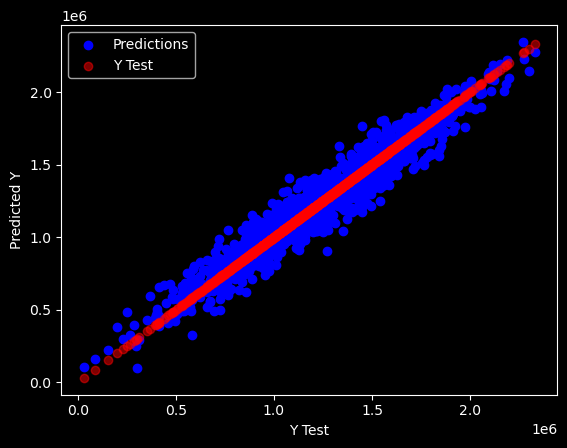

In [42]:
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Y Test')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend()

## Prediction Using OLS Method

In [43]:
import statsmodels.api as sm
X_11 = sm.add_constant(X_scaled)

In [44]:
X_11

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.0,0.686822,0.441986,0.501502,0.464444,0.329942
1,1.0,0.683521,0.488538,0.464501,0.242222,0.575968
2,1.0,0.483737,0.468609,0.701350,0.695556,0.528582
3,1.0,0.506630,0.660956,0.312430,0.280000,0.491549
4,1.0,0.469223,0.348556,0.611851,0.495556,0.376988
...,...,...,...,...,...,...
4995,1.0,0.475738,0.754359,0.385619,0.324444,0.326351
4996,1.0,0.675097,0.633450,0.444024,0.448889,0.366362
4997,1.0,0.507135,0.670026,0.208534,0.028889,0.476515
4998,1.0,0.558419,0.420389,0.517579,0.764444,0.611282


In [45]:
model = sm.OLS(Y,X_11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:55:15   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.419e+06   1.14e+04   -124.147      0.000   -1.44e+06    -1.4e+06
Avg. Area Income               1.94e+06   1.21e+04    160.656      0.000    1.92e+06    1.96e+06
Avg. Area House Age           1.139e+06   9923.152    114.754      0.000    1.12e+06    1.16e+06
Avg. Area Number of Rooms     9.078e+05   1.21e+04     75.170      0.000    8.84e+05    9.31e+05
Avg. Area Number of Bedrooms  7430.1257   5889.021      1.262      0.207   -4114.940     1.9e+04
Area Population               1.056e+06      1e+04    105.393      0.000    1.04e+06    1.08e+06
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the Model
Calculating R^2 and MSE 


In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81257.5579585597
MSE: 10169125565.897621
RMSE: 100842.08231635056


In [47]:
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.9185060945363621


The model demonstrates strong performance with an R-squared value of 0.919, indicating that approximately 91.9% of the variance in the dependent variable (Price) can be explained by the independent variables. The Mean Absolute Error (MAE) of approximately 81,258 suggests that, on average, the model's predictions deviate from the actual prices by this amount, while the Root Mean Squared Error (RMSE) of around 100,842 reflects the model's accuracy in a way that emphasizes larger errors.

- model demonstrates a strong fit with an R-squared value of 0.918, indicating that approximately 91.8% of the variability in the dependent variable (Price) can be explained by the independent variables



# KNN Regression

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [49]:
K=3
model = KNeighborsRegressor(n_neighbors = K)

In [50]:
model.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=3)

In [51]:
prediction1=model.predict(X_test)

In [52]:
prediction1.shape

(1500, 1)

In [53]:
y_test.shape

(1500, 1)

In [54]:
error = np.sqrt(mean_squared_error(y_test,prediction1))

In [55]:
error

144271.25903190573

In [56]:
print('RMSE value for k= ' , K , 'is:', error)
print('MSE value for k= ' , K , 'is:', error**2)

RMSE value for k=  3 is: 144271.25903190573
MSE value for k=  3 is: 20814196182.65124


## Choosing the best k

In [57]:
error_rate=[]
for i in range(1,15):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

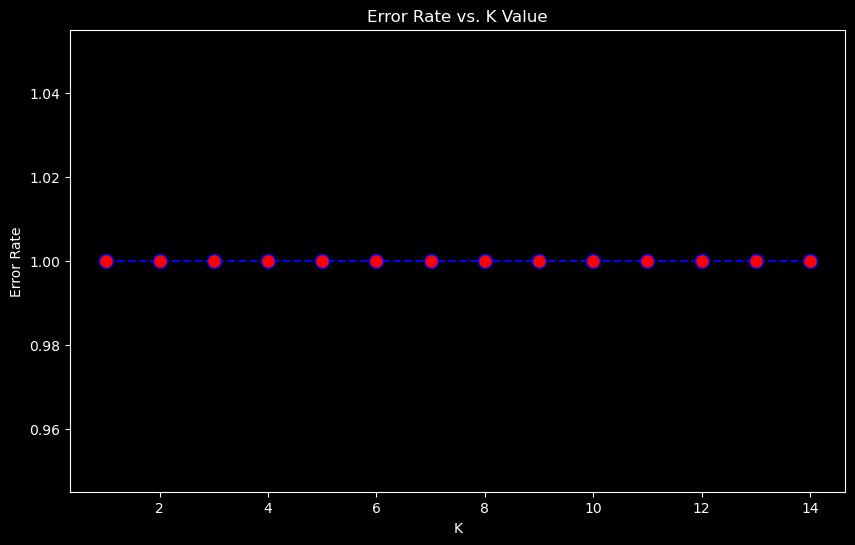

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Inference**:
- The error rate remains constant around 1.00 regardless of the k-value, which suggests that changing k doesn't significantly affect the model's performance.

## Model Evaluation

In [59]:
print('RMSE value for k= ' , K , 'is:', error)
print('MSE value for k= ' , K , 'is:', error**2)

RMSE value for k=  3 is: 144271.25903190573
MSE value for k=  3 is: 20814196182.65124


In [60]:
r2 = r2_score(y_test, prediction1)
print(f'R2 is : {r2}')


R2 is : 0.8331980340867324



The model with K=3 has an R-squared value of 0.833, indicating that about 83.3% of the variance in the dependent variable is explained by the independent variables. The Root Mean Squared Error (RMSE) of approximately 144,271 suggests a substantial average deviation from actual values, while the Mean Squared Error (MSE) of around 20.8 billion highlights the presence of larger errors in predictions, which may warrant further model refinement.


# Decision Tree

In [61]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# method 1 to visualize decision tree
from sklearn.tree import export_graphviz

# method 2 to visualize decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [62]:
dtr = DecisionTreeRegressor(random_state=42)

In [63]:
model = dtr.fit(X_train,y_train)

In [64]:
export_graphviz(model, out_file ='tree.dot',feature_names =X_train.columns)

In [65]:
feature_names =X_train.columns
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=feature_names)

[Text(0.4636128837803737, 0.9807692307692307, 'Avg. Area Income <= 0.542\nsquared_error = 124566837226.706\nsamples = 3500\nvalue = 1228190.26'),
 Text(0.19597390629574732, 0.9423076923076923, 'Avg. Area House Age <= 0.469\nsquared_error = 88881857885.114\nsamples = 1482\nvalue = 1018787.239'),
 Text(0.08671236125851917, 0.9038461538461539, 'Area Population <= 0.485\nsquared_error = 67931378982.833\nsamples = 703\nvalue = 863181.391'),
 Text(0.03928478753924104, 0.8653846153846154, 'Avg. Area Income <= 0.463\nsquared_error = 57555531356.296\nsamples = 301\nvalue = 739743.836'),
 Text(0.014491228712243205, 0.8269230769230769, 'Avg. Area Income <= 0.376\nsquared_error = 42789040963.587\nsamples = 146\nvalue = 614408.729'),
 Text(0.0037533141397875698, 0.7884615384615384, 'Avg. Area House Age <= 0.272\nsquared_error = 35286906996.591\nsamples = 43\nvalue = 469231.442'),
 Text(0.0013012573399046829, 0.75, 'Avg. Area Number of Rooms <= 0.691\nsquared_error = 28621403081.071\nsamples = 7\nva

In [ ]:
predictions2 = model.predict(X_test)

In [ ]:
predictions

## Evaluation of Model

In [ ]:
mse = mean_squared_error(y_test, predictions2)
r2 = r2_score(y_test, predictions2)
print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')